#### Modeling things manually 

Modeling 1 neuron with 3 inputs

In [3]:
input = [1 , 2, 3 ]
weights = [0.2 , 0.8 , -0.5]
bias = 2 

output = input[0]*weights[0] + input[1]*weights[1] + input[2]*weights[2] + bias
output

2.3

Modeling 3 neurons with 4 inputs  


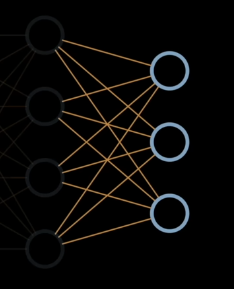

In [ ]:
input = [1 , 2, 3, 2.5 ]

# weights 

weights1 = [0.2 , 0.8 , -0.5 , 1.0] # these are all the weights going into neuron output 1 
weights2 = [0.5 , -0.91 , 0.26 , -0.5] # all the weights going into neuron output 2
weights3 = [-0.26 , -0.27 , 0.17 , 0.87]

bias1 = 2 
bias2 = 3 
bias3 = 0.5 

output = [input[0]*weights1[0] + input[1]*weights1[1] + input[2]*weights1[2] + bias1 + input[3]*weights1[3],
          input[0]*weights2[0] + input[1]*weights2[1] + input[2]*weights2[2] + bias2 + input[3]*weights2[3],
          input[0]*weights3[0] + input[1]*weights3[1] + input[2]*weights3[2] + bias3 + input[3]*weights3[3]]


output

[4.8, 1.21, 2.385]

Now Simplifying the code, and moving to a more dynamic code 

In [9]:
input = [1 , 2, 3, 2.5 ] 

weights = [[0.2 , 0.8 , -0.5 , 1.0],
           [0.5 , -0.91 , 0.26 , -0.5],
           [-0.26 , -0.27 , 0.17 , 0.87]]

bias = [ 2 , 3, 0.5 ]

In [14]:
# we are going to use zip funciton. this is how it works 

for x in zip (weights , bias):
    print(x)
    
type(zip (weights , bias))

([0.2, 0.8, -0.5, 1.0], 2)
([0.5, -0.91, 0.26, -0.5], 3)
([-0.26, -0.27, 0.17, 0.87], 0.5)


zip

In [16]:
layer_output = []

for neuron_weight , neuron_bias in zip (weights, bias) :
    neuron_output = 0 
    
    for neuron_input , weight in zip (input , neuron_weight):
        neuron_output += neuron_input * weight
        
    neuron_output += neuron_bias
    
    layer_output.append(neuron_output)
    
layer_output

[4.8, 1.21, 2.385]

#### Important stuff about lists 
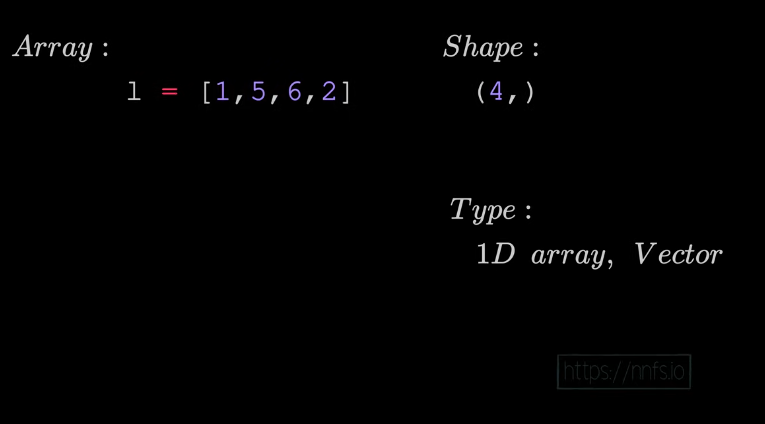 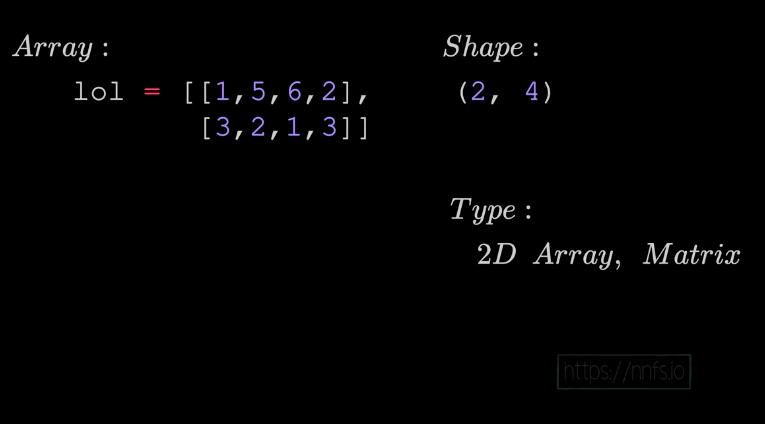 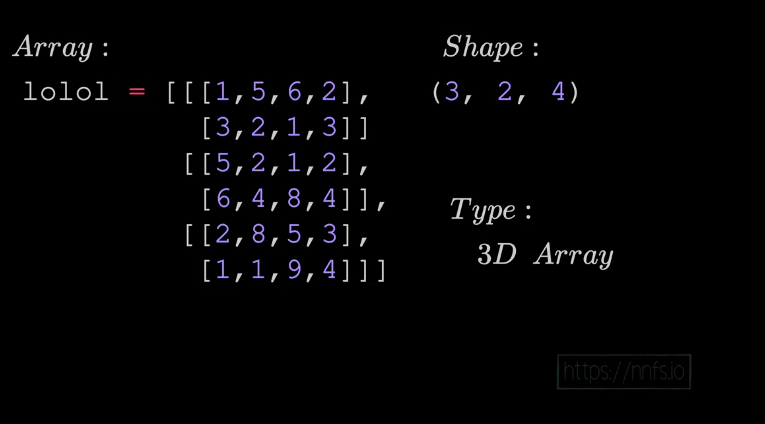

#### Trying things with lists 

Dot Product  

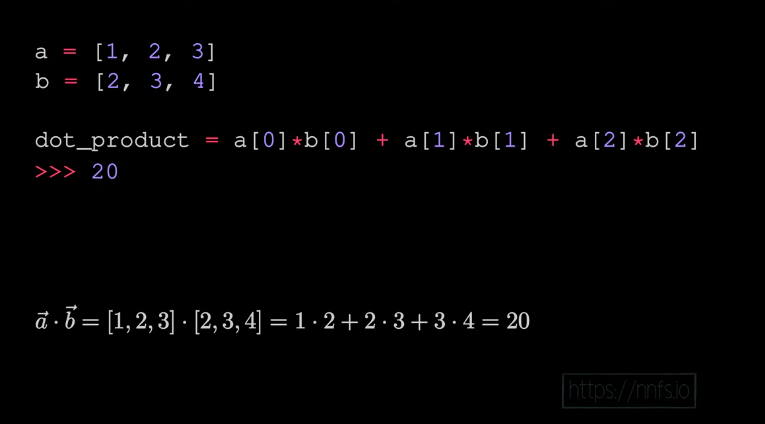

In [2]:
import numpy as np 

a = [1 , 2, 3 ]
b = [0.2 , 0.8 , -0.5]
c = 2 

output = np.dot(a , b ) + c
output

2.3

In [3]:
## now doing dot product with a layer of neurons 

In [23]:
input = [1 , 2, 3, 2.5 ] 


# this acts a layer of NN 

weights = [[0.2 , 0.8 , -0.5 , 1.0],
           [0.5 , -0.91 , 0.26 , -0.5],
           [-0.26 , -0.27 , 0.17 , 0.87]]

# weights = n_outputs * n_inputs
# for the first layer = n_neurons in next layer * n_features 

bias = [ 2 , 3, 0.5 ]


output = np.dot( weights , input) + bias
output 

## need to write weights before input, becaure output is indexed on the bases of first elements
## we iterate through the elemts of weights

array([4.8  , 1.21 , 2.385])

In [5]:
output2 = np.dot( input , weights) + bias

ValueError: shapes (4,) and (3,4) not aligned: 4 (dim 0) != 3 (dim 0)

#### Passing a batch of inputs 

In [13]:
input = [[1 , 2, 3, 2.5 ],
         [2.0 , 5.0 , -1.0 , 2.0 ],
         [-1.5 , 2.7 , 3.3 , -0.8]] 

weights = [[0.2 , 0.8 , -0.5 , 1.0],
           [0.5 , -0.91 , 0.26 , -0.5],
           [-0.26 , -0.27 , 0.17 , 0.87]]

bias = [ 2 , 3, 0.5 ]

# we encounter an error, because we have shape mismatch, 

# 3*4 and 3*4 


Output will always show error, due to boradcasting, so now we need to take a transpose  

Initially we could do this, because, weights was matrix, and input was a vector, so it gave a vector.  

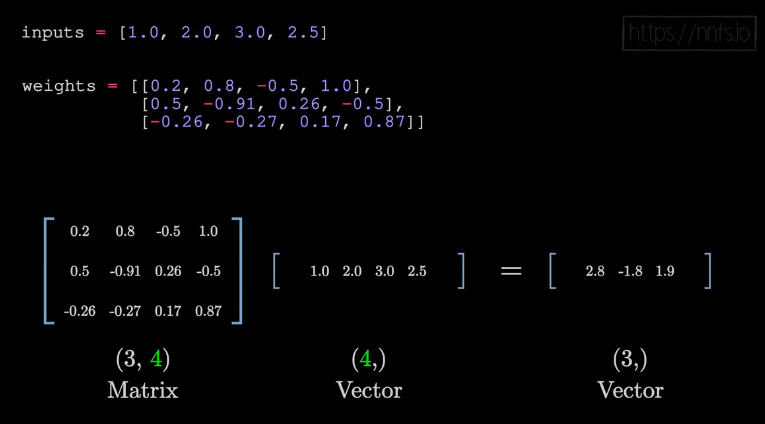  


But When inputs became a batch of inputs, the shape did not workout anymore.  

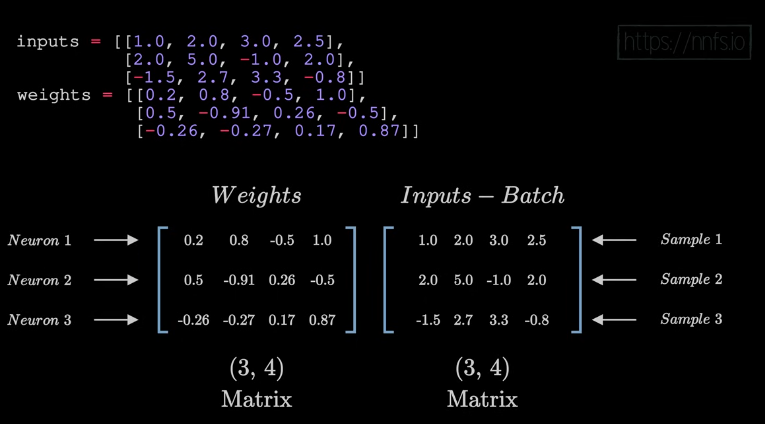  

What we need to do is transpose the weights, as then, all things start to match.  

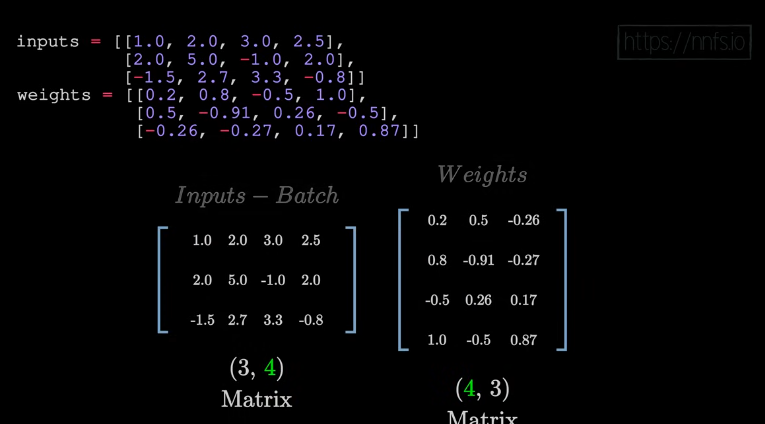


In [10]:
output2 = np.dot( weights , input) + bias


ValueError: shapes (3,4) and (3,4) not aligned: 4 (dim 1) != 3 (dim 0)

In [15]:
output = np.dot( input , np.transpose(weights)) + bias
output

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

#### Adding a new Layer 

In [18]:
input = [[1 , 2, 3, 2.5 ],
         [2.0 , 5.0 , -1.0 , 2.0 ],
         [-1.5 , 2.7 , 3.3 , -0.8]] 

weights = [[0.2 , 0.8 , -0.5 , 1.0],
           [0.5 , -0.91 , 0.26 , -0.5],
           [-0.26 , -0.27 , 0.17 , 0.87]]

bias = [ 2 , 3, 0.5 ]


weights2 = [[0.1 , -0.14 , 0.5],
           [-0.5 , 0.12 , -0.33],
           [-0.44 , 0.73 , -0.13]]

bias2 = [ -1 , 2, -0.5 ]


In [20]:
layer1_output = np.dot ( input , np.transpose(weights)) + bias 
layer1_output

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

In [22]:
layer2_output = np.dot( layer1_output , np.transpose(weights2)) + bias2
layer2_output

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

#### Converting all this to an object 

Now we will make input as X

In [48]:
import numpy as np

np.random.seed (0) 

class Layer_Dense : 
    
    def __init__(self , n_inputs, n_neurons ):
        
        self.weights = 0.10 * np.random.randn (n_inputs , n_neurons)
        
        # initially in the matrix we created, we had output * input , 
        # here we are taling input * output, as now we dont have to take the transpose. 

        self.bias = np.zeros((1 , n_neurons))
        
     
    def forward (self, inputs ):
        self.output = np.dot (inputs , self.weights) + self.bias

In [49]:
X = [[1 , 2, 3, 2.5 ],
     [2.0 , 5.0 , -1.0 , 2.0 ],
     [-1.5 , 2.7 , 3.3 , -0.8]] 

In [50]:
layer1 = Layer_Dense(len(X[0]), 5)  # As this is the first leayer, the number of inputs = features in first input
# in this case it is 4 , 
# n_neurons can be anything you want.  Any number of neurons you desire 
 
layer2 = Layer_Dense( 5 , 2)
 # input of layer2 = output of layer1
 

## Now passing the data using foward method 

layer1.forward(X)
print("Layer 1 : ")
print(layer1.output)

layer2.forward(layer1.output)
layer2.output

Layer 1 : 
[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]


array([[ 0.148296  , -0.08397602],
       [ 0.14100315, -0.01340469],
       [ 0.20124979, -0.07290616]])